# Data Analyst P2 - Titanic Data 
### Jasper Alblas

# Data

In this project I will take a look at the titanic data available at: https://www.udacity.com/api/nodes/5454512672/supplemental_media/titanic-datacsv/download?_ga=1.252122752.865670529.1472211743

This data set contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

## Variable Descriptions:
* survival:        Survival (0 = No; 1 = Yes)
* pclass:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name:            Name
* sex:             Sex
* age:             Age
* sibsp:           Number of Siblings/Spouses Aboard
* parch:           Number of Parents/Children Aboard
* ticket:          Ticket Number
* fare:            Passenger Fare
* cabin:           Cabin
* embarked:        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Loading the Data

In [142]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

df = pd.read_csv('titanic_data.csv')

# Checking the data types
df.head(10)

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Questions

Now that I have taken a look at the data, it is time to state some questions that we will hopefully be able to answer with this data set.

1. What factors influence a person's chance of survival? Specifically:
    1. Does gender influence survival chance? (women could go on lifeboats first)
    2. Does age influence survival chance? (children could also go on lifeboats first)
    3. Does wealth influence survival chance? (I will use passenger class as proxy for socio-economic status)
    4. Does the number of siblings or parents/children influence survival chance?

Extra:
2. Does the embarkation port show any kind of relationship with for example passenger class or fare price?
3. Which factors influence fare price?

# Exploring the data

First we will have a look at the data types, to get a general feel for the dataset and to see if there are any problems that need attention.

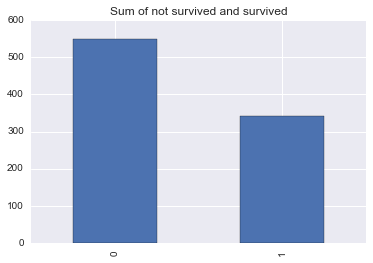

In [143]:
survival_bar = df.Survived.value_counts().plot(kind='bar', title="Sum of not survived and survived")
survival_bar

This bar plot shows that there unfortunately were more people who passed away than survivors in this sample.

In [144]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


This table shows that there seems to be a difference between the survival rate of males and female, a point we should investigate more later on.

In [145]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Grouping the data by survival seems to show that passengers which survived the disaster are on average traveling on a higher class, and have paid a higher fare than passengers which did not survive.

In [146]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


If we focus on the 'Survived' variable, we can see there are indeed potential relatively strong correlations between it and the passenger's class and fare price. As we can assume that higher class tickets are more expensive, these are probably related as well.

# Fixing problems (wrangling)

Before analyzing the data further, the data needs to be prepared so that it is in the proper format for analysis. Let's have a look at the data types first.

In [147]:
# Check the data types in the data frame
print df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


This seems to be expected. The only change we will make is converting the 'Survived' column to a boolean for logic sake. I do not expect this to make any difference in the way calculations are made (as 0 and 1 are probably interpeted as false and true anyway), but let's change it anyway so it looks cleaner on plots.

In [148]:
# Will convert the 'survived' column from int to a boolean
df['Survived'] = df['Survived'].astype('bool')

In [149]:
# Let's see if this has done its job
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


While not strictly necessary, we will remove the "Ticket", and "Cabin" columns as we will not use them in this analysis.

In [150]:
del df["Ticket"]
del df["Cabin"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [151]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,2,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,False,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,NaN,S
freq,NaN,549,NaN,1,577,NaN,NaN,NaN,NaN,644
mean,446.000000,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,NaN,2.000000,NaN,NaN,NaN,0.000000,0.000000,7.910400,NaN
50%,446.000000,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,14.454200,NaN
75%,668.500000,NaN,3.000000,NaN,NaN,NaN,1.000000,0.000000,31.000000,NaN


In [152]:
df["Age"].isnull().sum()

177

Here we can clearly see that that most columns have 891 values, but there are some missing values in the age column. Since this column only has a count of 714, this means that 891 - 714 = 177 values are missing. This should be kept in mind while analyzing the effect of age on survival chance, as these values should be removed. We will do this now.

In [153]:
age_non_null = df.dropna(subset = ['Age'])

For the other analyses we will use the complete data set, as there is nothing wrong with these 177 passengers beside the age column.

Besides this, there does not seem to be anything wroing with the data set. The only thing that comes to mind is the large max "Fare" value of 512.33, while the median is only 14.45. Let's have a look to see if there is anything wrong with this value.

In [154]:
df.loc[df['Fare'] == 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
258,259,True,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C
679,680,True,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C
737,738,True,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C


Since there more passengers that paid this extreme fare which do not seem to be related, and they do travel first class, it is decided not to remove these values. It is interesting to note that these 3 persons all survived.

Further research has indicated that these passengers were actually living in the most expensive suites on the ship.
- https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html
- https://www.encyclopedia-titanica.org/titanic-survivor/gustave-lesueur.html
- https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html

Since the main interest in this study will be to see which factors influence survival chance, we will now group the dataset between persons who survived and passengers who did not survive. Since we will often group the dataset by a specific column to look at the the mean I will create a function for it.

In [155]:
def groupByColumnAndPrintMean(dataset, column):
    return dataset.groupby(column).mean()
    
groupByColumnAndPrintMean(df, 'Survived')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
False,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
True,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [156]:
# Let's divide the dataset in two by whether a passenger survived or not
only_survived = df[df.Survived]
only_non_survived = df[df.Survived == False]

only_survived.describe() 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.000000,NaN,0.000000,0.000000,12.475000
50%,439.500000,2.000000,NaN,0.000000,0.000000,26.000000
75%,651.500000,3.000000,NaN,1.000000,1.000000,57.000000
max,890.000000,3.000000,80.000000,4.000000,5.000000,512.329200


In [157]:
only_non_survived.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,2.000000,NaN,0.000000,0.000000,7.854200
50%,455.000000,3.000000,NaN,0.000000,0.000000,10.500000
75%,675.000000,3.000000,NaN,1.000000,0.000000,26.000000
max,891.000000,3.000000,74.000000,8.000000,6.000000,263.000000


# Analysis

Now that we have a general feel of the dataset, and some issues have been fixued, we will have a look to investigate which variables correlate with the chance of surival.

## Gender

Since women were allowed to go on the lifeboats first (together with children) it can be expected that they have a larger survival rate. Let's investigate. 

In [158]:
sexGrouped = groupByColumnAndPrintMean(df, 'Sex')
sexGrouped

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


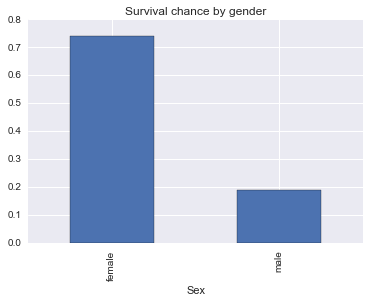

In [159]:
sexGrouped["Survived"].plot(kind="bar", title="Survival chance by gender")

These statistics and plots make it pretty clear that there is an observable difference between the survival chance of males and females. Let's do a quick t test to see if these differences are significant. We will use a t-test, as the population parameters and unknown, and we we have big sample size.

The independent t-test, also called the two sample t-test, independent-samples t-test or student's t-test, is an inferential statistical test that determines whether there is a statistically significant difference between the means in two unrelated groups.

The null hypothesis for the independent t-test is that the population means from the two unrelated groups are equal:

H0: u1 = u2

The alternative hypothesis is that the population means are not equal:

HA: u1 ≠ u2

We will use an alpha level of 0.05 and since we don't care on the direction the test will be two-tailed.

In [160]:
def twoSampledTest(var1, var2):
    result = ttest_ind(var1,var2)
    print "The t value is: %s" % result[0]
    print "P-value: %s" % result[1]

In [161]:
maleOnly = df[df["Sex"] == "male"]
femaleOnly = df[df["Sex"] == "female"]
twoSampledTest(maleOnly["Survived"], femaleOnly["Survived"])

The t value is: -19.2978165501
P-value: 1.40606613088e-69


The P-value is extremely small, which shows that the populations mean are not equal. The null hypothesis is therefore dismissed.

## Age

Age might have a influence on the survival rate, as children were allowed on lifeboats first. On the other hand, older people might be of poorer health. Let's look at this issue more.

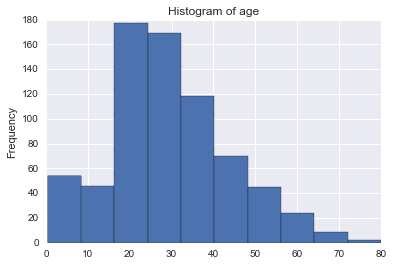

In [162]:
df["Age"].plot('hist', title="Histogram of age")

Earlier we saw that the age column of the data frame contains quite a few missing values. While this does not pose a problem for other variables, we should remove these values if we want to able to draw conclusion about the possible correlation between age and surival.

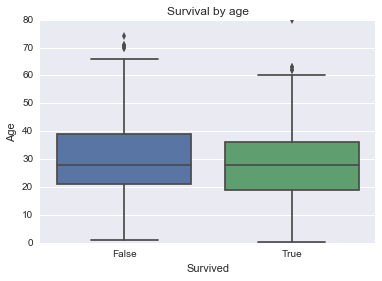

In [163]:
age_plot_survival = sns.boxplot("Survived", "Age", data=age_non_null)
age_plot_survival.set_title("Survival by age")

The boxplot above shows that there might be a larger share of older people that do not survive. This needs to be investigate further.

To find out how the children survival rate was, we need to seperate the data set between people aged less than 18, and people 18 years and older. In addition we will have a look at people older than 65.

In [164]:
children = age_non_null[age_non_null.Age < 18 ]
adults = age_non_null[(age_non_null.Age >= 18) & (age_non_null.Age < 65)]
old_people = age_non_null[age_non_null.Age >= 65]
print "Child survival rate: %.2f" % children.Survived.mean()
print "Adult survival rate: %.2f" % adults.Survived.mean()
print "Senior survival rate: %.2f" % old_people.Survived.mean()

Child survival rate: 0.54
Adult survival rate: 0.39
Senior survival rate: 0.09


Let's do a t-test for two independant samples to test if there is a significant difference.

We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [165]:
twoSampledTest(children['Survived'], adults['Survived'])

The t value is: 3.05151825586
P-value: 0.00236284939711


In [166]:
twoSampledTest(old_people['Survived'], adults['Survived'])

The t value is: -2.00308856493
P-value: 0.0456178424909


In [167]:
print adults.index
print children.index
print old_people.index

Int64Index([  0,   1,   2,   3,   4,   6,   8,  11,  12,  13,
            ...
            880, 881, 882, 883, 884, 885, 886, 887, 889, 890],
           dtype='int64', length=590)
Int64Index([  7,   9,  10,  14,  16,  22,  24,  39,  43,  50,
            ...
            827, 830, 831, 841, 844, 850, 852, 853, 869, 875],
           dtype='int64', length=113)
Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


Since the degrees of freedom are very high (children: 701, senior: 599) the critical t value lies around 1.97. This means that both previous test are significant. In other words, it can be said that the children's population survival cance mean is significantly higher than that of adults. On the other hand, old people have a significantly lower survival chance.

An alternative way of dividing the dataset by age would be to use pandas cut function:

In [168]:
labels = ['0-19', '20-39', '40-59', '60-79']
age_column = age_non_null["Age"]

pd.options.mode.chained_assignment = None  # default='warn'

age_non_null['AgeGroup'] = pd.cut(age_column, range(0, 81, 20), right=False, labels=labels)
age_non_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,20-39
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,20-39
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,20-39
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,20-39
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,20-39


In [169]:
age_non_null.groupby('AgeGroup').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
AgeGroup,,,,,,,
0-19,436.945122,0.481707,2.530488,11.979695,1.115854,0.823171,31.794741
20-39,450.155039,0.387597,2.304910,28.580103,0.335917,0.284238,32.931200
40-59,456.700730,0.394161,1.824818,47.354015,0.343066,0.401460,41.481784
60-79,448.800000,0.240000,1.560000,64.500000,0.240000,0.320000,44.006668


These statistics also show that the survival chance seems to decrease with age. Passengers class also seems to increase (lower number means higher class) with age, which I suppose could be due to older people having more money to spend. I will not investigate this further.

## Influence of class

It is worth investigating to see if the passengers class has any correlation with survival chance. In this case the passengers class will be used as an proxy for socio-economic status. It could be imagined that wealthy passengers would have some form of priority in relation to the boarding of lifeboats.

In [170]:
groupByColumnAndPrintMean(df, "Pclass")['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

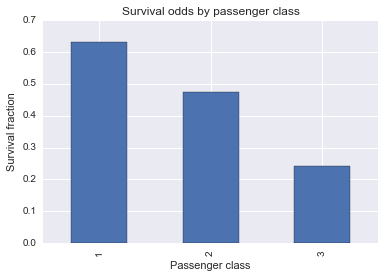

In [171]:
pclass_survival = groupByColumnAndPrintMean(df, "Pclass")['Survived'].plot(kind='bar', title="Survival odds by passenger class")
pclass_survival.set_xlabel("Passenger class")
pclass_survival.set_ylabel("Survival fraction")

This clearly gives an indication that the survival chance decreases with lower passenger class. Let's divide the data set in 3 seperate sets.

In [172]:
first_class = df[df.Pclass == 1]
second_class = df[df.Pclass == 2]
third_class = df[df.Pclass == 3]
print first_class.Survived.mean()
print second_class.Survived.mean()
print third_class.Survived.mean()

0.62962962963
0.472826086957
0.242362525458


Let's do some t-tests. Conditions are as for the previously described t-tests:

In [173]:
twoSampledTest(first_class["Survived"], third_class["Survived"])

The t value is: 10.623796624
P-value: 1.48039591199e-24


In [174]:
twoSampledTest(first_class["Survived"], second_class["Survived"])

The t value is: 3.17861405233
P-value: 0.00159546566684


As expected, there are significant differences between the population means for survival rate between both first and third, and first and second class.

## Family members

A final issue we will investigate is if the number of family members on board have any form of relation with wether a passenger survived. We will look at these 2 variables: 

- **parch**: Number of Parents/Children Aboard
- **sibsp**: Number of Siblings/Spouses Aboard

The underlying idea is that a passenger might want to spend time on finding their relatives, before trying to board a lifeboat. This might mean that the passenger has a reduced chance of survival.

In [175]:
df.groupby('Parch').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


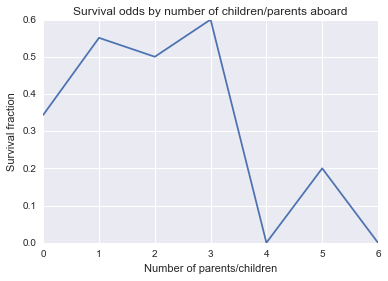

In [176]:
parch_survival = df.groupby('Parch').mean()['Survived'].plot(title="Survival odds by number of children/parents aboard")
parch_survival.set_xlabel("Number of parents/children")
parch_survival.set_ylabel("Survival fraction")

This might look tempting for some fancy conclusion, but further investigation show that there were only a few passengers with 4 or more parents/children on board. I therefore refrain from any conclusion as the sample size is too small.

In [177]:
df[df["Parch"] >= 4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
13,14,False,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,31.2750,S
25,26,True,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,31.3875,S
167,168,False,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,27.9000,S
360,361,False,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,27.9000,S
438,439,False,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S
567,568,False,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S
610,611,False,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,31.2750,S
638,639,False,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,39.6875,S
678,679,False,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,46.9000,S
885,886,False,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q


Let's look at siblings and spouses instead.

In [178]:
df.groupby('SibSp').mean()

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


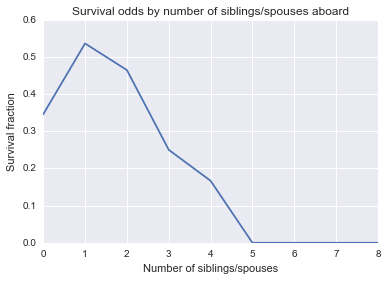

In [179]:
siblings_survival = df.groupby('SibSp').mean()['Survived'].plot(title="Survival odds by number of siblings/spouses aboard")
siblings_survival.set_xlabel("Number of siblings/spouses")
siblings_survival.set_ylabel("Survival fraction")

In [180]:
df[df["SibSp"] >= 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
16,17,False,3,"Rice, Master. Eugene",male,2.0,4,1,29.1250,Q
24,25,False,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,21.0750,S
27,28,False,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,S
50,51,False,3,"Panula, Master. Juha Niilo",male,7.0,4,1,39.6875,S
59,60,False,3,"Goodwin, Master. William Frederick",male,11.0,5,2,46.9000,S
63,64,False,3,"Skoog, Master. Harald",male,4.0,3,2,27.9000,S
68,69,True,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,7.9250,S
71,72,False,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,46.9000,S
85,86,True,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,15.8500,S


In [181]:
less_than_three_siblings = df[df["SibSp"] < 3]
three_or_more_siblings = df[df["SibSp"] >= 3]
twoSampledTest(less_than_three_siblings["Survived"], three_or_more_siblings["Survived"])

The t value is: 3.33455978094
P-value: 0.000889689943235


With the same test conditions as before (95% confidence level, alpha of 0.05, 2-sampled independant t-test) we can see that the difference in the mean for survival are actually considered significant for the two populations corrosponding to the two samples. Whether this correlation is because of the previously mentioned theory or some other factor remains to be seen.

## Embarkation port (extra)

We will now have a very quick look to see if there is any correlation between the departure port and other variables.

In [182]:
portGroups= groupByColumnAndPrintMean(df, 'Embarked')
portGroups

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


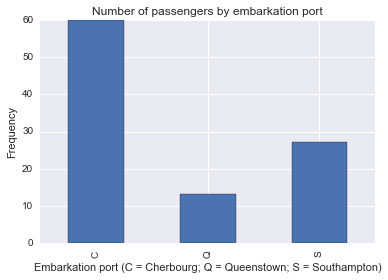

In [183]:
port_frequencies = portGroups["Fare"].plot(kind="bar", title="Number of passengers by embarkation port")
port_frequencies.set_xlabel('Embarkation port (C = Cherbourg; Q = Queenstown; S = Southampton)')
port_frequencies.set_ylabel('Frequency')

As you can see, the average fare price for passengers starting in Cherbourg is much higher than for the other ports. We have to be careful with making conclusions though as the 3 passengers with the extreme fare price of 512.329200 were all departing from here. These have distorted the mean value, so therefore it is better to look at other statistics, such as the median.

In [184]:
df.groupby("Embarked").describe()

Age        Fare       Parch  PassengerId      Pclass  \
Embarked                                                                      
C        count  130.000000  168.000000  168.000000   168.000000  168.000000   
         mean    30.814769   59.954144    0.363095   445.357143    1.886905   
         std     15.434860   83.912994    0.660481   259.454201    0.944100   
         min      0.420000    4.012500    0.000000     2.000000    1.000000   
         25%           NaN   13.697950    0.000000   235.500000    1.000000   
         50%           NaN   29.700000    0.000000   455.000000    1.000000   
         75%           NaN   78.500025    1.000000   651.000000    3.000000   
         max     71.000000  512.329200    3.000000   890.000000    3.000000   
Q        count   28.000000   77.000000   77.000000    77.000000   77.000000   
         mean    28.089286   13.276030    0.168831   417.896104    2.909091   
         std     16.915396   14.188047    0.656999   253.646282    0.369274   
         min      2.000000    6.750000    0.000000     6.000000    1.000000   
         25%           NaN    7.750000    0.000000   209.000000    3.000000   
         50%           NaN    7.750000    0.000000   389.000000    3.000000   
         75%           NaN   15.500000    0.000000   630.000000    3.000000   
         max     70.500000   90.000000    5.000000   891.000000    3.000000   
S        count  554.000000  644.000000  644.000000   644.000000  644.000000   
         mean    29.445397   27.079812    0.413043   449.527950    2.350932   
         std     14.143192   35.887993    0.853253   256.942044    0.789402   
         min      0.670000    0.000000    0.000000     1.000000    1.000000   
         25%           NaN    8.050000    0.000000   225.750000    2.000000   
         50%           NaN   13.000000    0.000000   447.500000    3.000000   
         75%           NaN   27.900000    0.000000   673.250000    3.000000   
         max     80.000000  263.000000    6.000000   889.000000    3.000000   

                     SibSp  
Embarked                    
C        count  168.000000  
         mean     0.386905  
         std      0.557213  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      2.000000  
Q        count   77.000000  
         mean     0.428571  
         std      0.979105  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      0.000000  
         max      4.000000  
S        count  644.000000  
         mean     0.571429  
         std      1.216600  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      8.000000

These results actually point out that the median and standard deviation for fare prices paid by passengers leaving from Cherbourg are also much higher than for the other two ports. The fact that survival rates also seem to be higher for Cherbourg is possible related to the previously discussed correlation between fare prices, passenger class and survival rates.

## Fare price (extra)

Finally, let's have a quick look at fare prices. The below figure clearly shows that fare prices seem to be higher for higher class tickets with a much wider distribution.

[<matplotlib.text.Text at 0x1482801d0>, <matplotlib.text.Text at 0x14800cb50>]

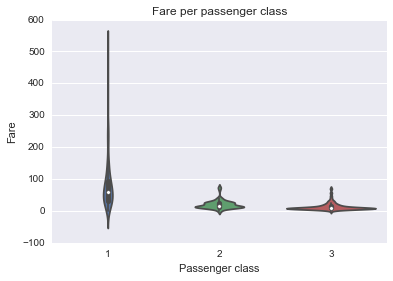

In [185]:
fare_plot = sns.violinplot("Pclass", "Fare", data=df)
fare_plot.set_title("Fare per passenger class")
fare_plot.set(xlabel='Passenger class', ylabel='Fare')

# Conclusion

This report has hopefully shown that there are a few conclusion we can make regarding survivors of the Titanic disaster. we have seen that survivors tend to be female, or children. In addition, passengers with higher class tickets also seemed to have had a better chance surviving. Finally, the number of siblings might have a positive relationship with survival rate as well, but this would need to be investigated better.

As a final statistic, let's take a look at female passengers who are traveling first class. We would expect them to have a very good surival rate.

In [186]:
woman_and_first_class = df[(df["Pclass"] == 1) & (df["Sex"] == "female")]

In [187]:
woman_and_first_class.mean()["Survived"]

0.96808510638297873

This is the case!

## Limitations



As with all datasets, there are bound to be some uncertainties and weaknesses involved. In this case, there is only data for 774 of the 2214 passengers. While the exact method of sampling is unknown to me, there is bound to be some biases involved. 

In addition, it is likely that there are other factors involved in the survival chance of a person, which are not taken along in this dataset. It is for example forseeable that information regarding the life boats could be very relevant. It would be intersting to know whether a passenger was able to board a life boat, the quality of the life boat, and how many passengers were on the life boat. All of these factors could potentially have a greater influence on the survival chance than some of the effects discussed in this study. In addition, it would be interesting to have some kind of insight into the general health of the passengers, as this could also have a great effect on the survival chance.